0. Car sales in Norway - emissions and trends
From lecture 02 with car sales in Norway, we worked with one dataset, however there were some more that you downloaded from kaggle. In this exercise, work with this dataset norway_new_car_sales_by_month.csv

  a) Do some EDA with info, find out column names, shape of dataset, describe method to get summary descriptive statistics.

In [3]:
import pandas as pd

df = pd.read_csv("data/norway_new_car_sales_by_month.csv")

df

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016,9,13854,1433,1526,-373,42780.0,236.0,88,98,128,3838,27.7,39.3,3991.0,2629.0,517.0
117,2016,10,11932,-1265,1365,-443,39797.0,-1611.0,91,98,127,3544,29.7,39.7,3209.0,1861.0,486.0
118,2016,11,13194,594,1305,-233,39721.0,2246.0,88,100,128,3892,29.5,39.7,3181.0,2567.0,502.0
119,2016,12,13602,524,1137,-96,31761.0,-631.0,98,106,136,4829,35.5,41.5,2597.0,2319.0,361.0


In [4]:
df.head()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN


In [5]:
df.shape # wide

(121, 17)

In [6]:
df["Year"]

0      2007
1      2007
2      2007
3      2007
4      2007
       ... 
116    2016
117    2016
118    2016
119    2016
120    2017
Name: Year, Length: 121, dtype: int64

 ## b) Draw a line chart of quantity for each year. Is there a year that should be skipped?



<Axes: xlabel='Year'>

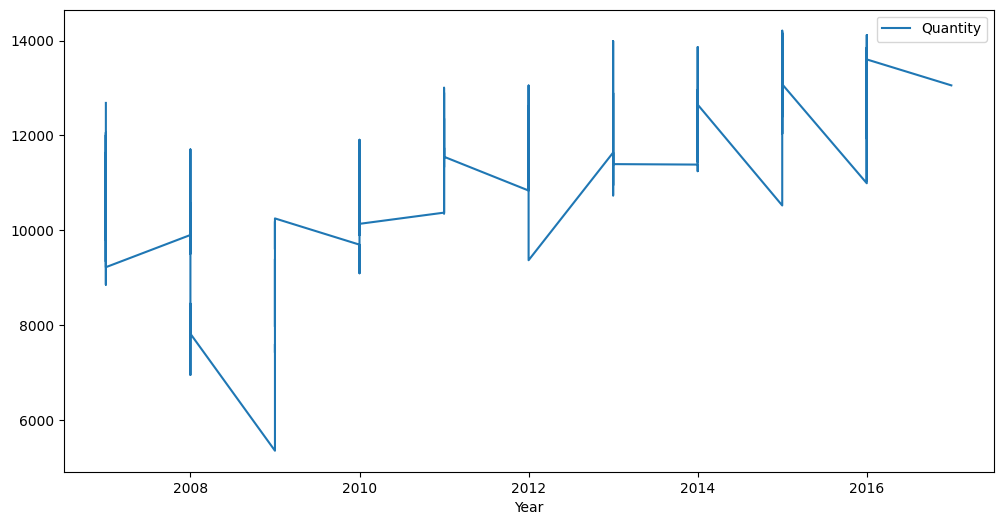

In [7]:
df.plot(x="Year", y="Quantity", figsize=(12,6))

In [8]:
import duckdb
df_yearly = duckdb.query("""--sql
    SELECT year,
            sum(Quantity) as quantity
    from df
    group by year
    order by year
""").df()

df_yearly

,Year,quantity
0,2007,129195.0
1,2008,110617.0
2,2009,98675.0
3,2010,127754.0
4,2011,138345.0
5,2012,137967.0
6,2013,142151.0
7,2014,144202.0
8,2015,150686.0
9,2016,154603.0


In [9]:
df_yearly = df_yearly.iloc[:-1]

<Axes: xlabel='Year'>

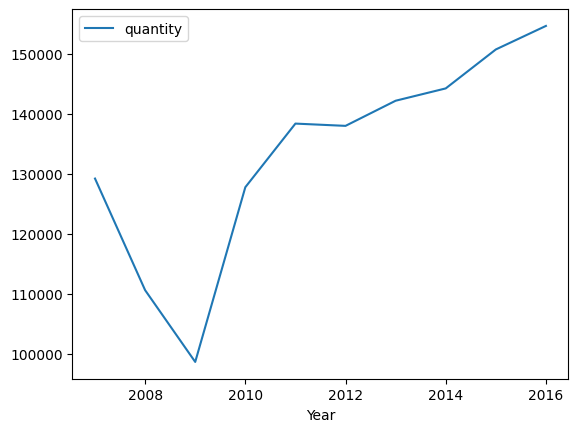

In [10]:
df_yearly.plot(x="Year", y="quantity")

 ## c) Draw a line chart of average CO2 emissions for same years that as in b)

In [11]:
df_co2 = duckdb.query("""--sql
    select 
        year,
        sum(avg_co2) as avg_co2
        from df
    group by year
    order by year
    """).df()

df_co2

,Year,avg_co2
0,2007,1908.0
1,2008,1896.0
2,2009,1811.0
3,2010,1688.0
4,2011,1608.0
5,2012,1559.0
6,2013,1476.0
7,2014,1325.0
8,2015,1197.0
9,2016,1120.0


<Axes: xlabel='Year'>

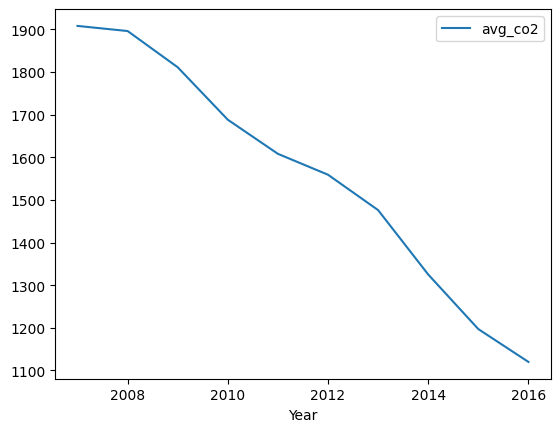

In [12]:
df_co2.iloc[:-1].plot(x="Year", y="avg_co2")


  ## d) Draw a line chart of all years and months for import

In [13]:
df_years_month = duckdb.query("""--sql
    SELECT Year || '-' ||LPAD(CAST(Month as VARCHAR),2,'0') AS date,
            SUM(Import) AS Import
    From df
    GROUP BY date
    ORDER BY date
""").df()

df_years_month


,date,Import
0,2007-01,2276.0
1,2007-02,1992.0
2,2007-03,2626.0
3,2007-04,2220.0
4,2007-05,2881.0
...,...,...
116,2016-09,1526.0
117,2016-10,1365.0
118,2016-11,1305.0
119,2016-12,1137.0


<Axes: xlabel='date'>

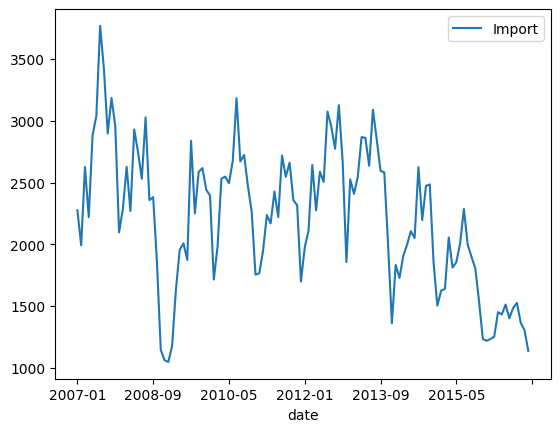

In [14]:
df_years_month.iloc[:-1].plot(x="date", y="Import")

## e) Draw a line chart of all years and months for average CO2 emissions

In [15]:
df_years_month_average_co2 = duckdb.query("""--sql
    SELECT Year || '-' ||LPAD(CAST(Month as VARCHAR),2,'0') AS date,
            SUM(Import) AS Import,
            sum(avg_co2) as avg_co2
            
    From df
    GROUP BY date
    ORDER BY date
""").df()

df_years_month_average_co2

,date,Import,avg_co2
0,2007-01,2276.0,152.0
1,2007-02,1992.0,156.0
2,2007-03,2626.0,159.0
3,2007-04,2220.0,160.0
4,2007-05,2881.0,160.0
...,...,...,...
116,2016-09,1526.0,88.0
117,2016-10,1365.0,91.0
118,2016-11,1305.0,88.0
119,2016-12,1137.0,98.0


<Axes: xlabel='date'>

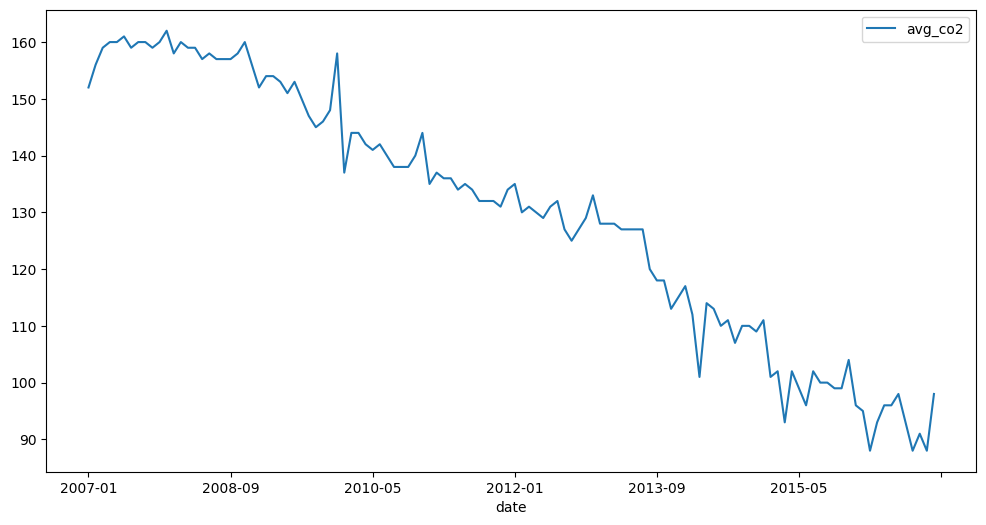

In [16]:
df_years_month_average_co2.iloc[:-1].plot(x="date", y="avg_co2", figsize=(12,6))

## f) Draw a line chart of all years and months for electric cars import

In [17]:
df

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016,9,13854,1433,1526,-373,42780.0,236.0,88,98,128,3838,27.7,39.3,3991.0,2629.0,517.0
117,2016,10,11932,-1265,1365,-443,39797.0,-1611.0,91,98,127,3544,29.7,39.7,3209.0,1861.0,486.0
118,2016,11,13194,594,1305,-233,39721.0,2246.0,88,100,128,3892,29.5,39.7,3181.0,2567.0,502.0
119,2016,12,13602,524,1137,-96,31761.0,-631.0,98,106,136,4829,35.5,41.5,2597.0,2319.0,361.0


In [18]:
df_electric_cars_import_month_year = duckdb.query("""--sql
    SELECT Year || '-' ||LPAD(CAST(Month as VARCHAR),2,'0') AS date,
        SUM(Import_Electric) AS import_electric_cars
    FROM df
    GROUP BY date
    ORDER BY date
""").df()

df_electric_cars_import_month_year

,date,import_electric_cars
0,2007-01,NaN
1,2007-02,NaN
2,2007-03,NaN
3,2007-04,NaN
4,2007-05,NaN
...,...,...
116,2016-09,517.0
117,2016-10,486.0
118,2016-11,502.0
119,2016-12,361.0


In [19]:
##df_electric_cars_import_month_year["electric_cars"] = df_electric_cars_import_month_year["import_electric_cars"].fillna(0)

<Axes: xlabel='date'>

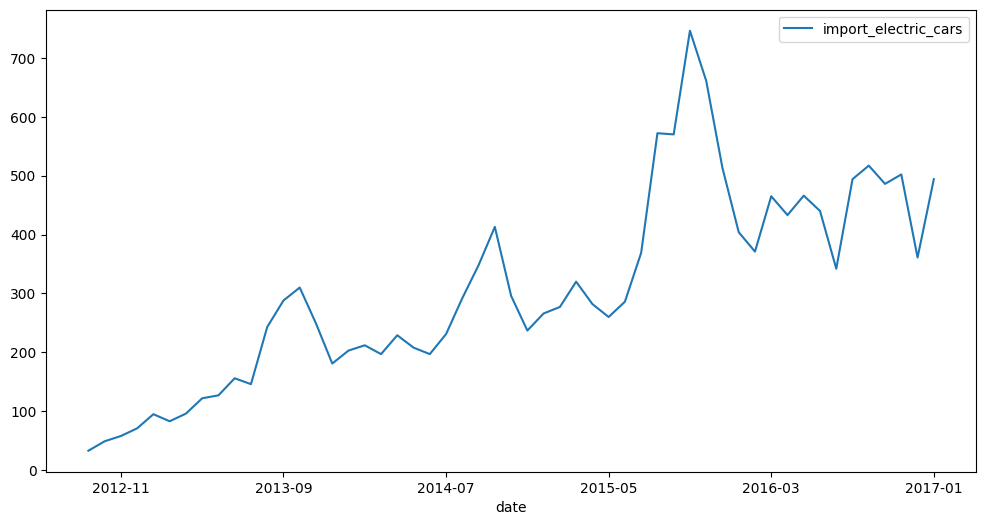

In [20]:
df_electric_cars_import_month_year.plot(x="date", y=("import_electric_cars"), figsize=(12,6))

##  g) Draw a line chart of average diesel share per year

In [21]:
import pandas as pd     
df



,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016,9,13854,1433,1526,-373,42780.0,236.0,88,98,128,3838,27.7,39.3,3991.0,2629.0,517.0
117,2016,10,11932,-1265,1365,-443,39797.0,-1611.0,91,98,127,3544,29.7,39.7,3209.0,1861.0,486.0
118,2016,11,13194,594,1305,-233,39721.0,2246.0,88,100,128,3892,29.5,39.7,3181.0,2567.0,502.0
119,2016,12,13602,524,1137,-96,31761.0,-631.0,98,106,136,4829,35.5,41.5,2597.0,2319.0,361.0


In [22]:
df_average_diesel_share_per_year = duckdb.query("""--sql
    SELECT Year,
        AVG(Diesel_Share) AS avg_diesel
    FROM df
    GROUP BY year
    ORDER BY year
""").df()

df_average_diesel_share_per_year

,Year,avg_diesel
0,2007,74.216667
1,2008,72.300000
2,2009,72.241667
3,2010,74.875000
4,2011,75.550000
5,2012,64.391667
6,2013,52.933333
7,2014,48.783333
8,2015,40.991667
9,2016,31.691667


<Axes: xlabel='Year'>

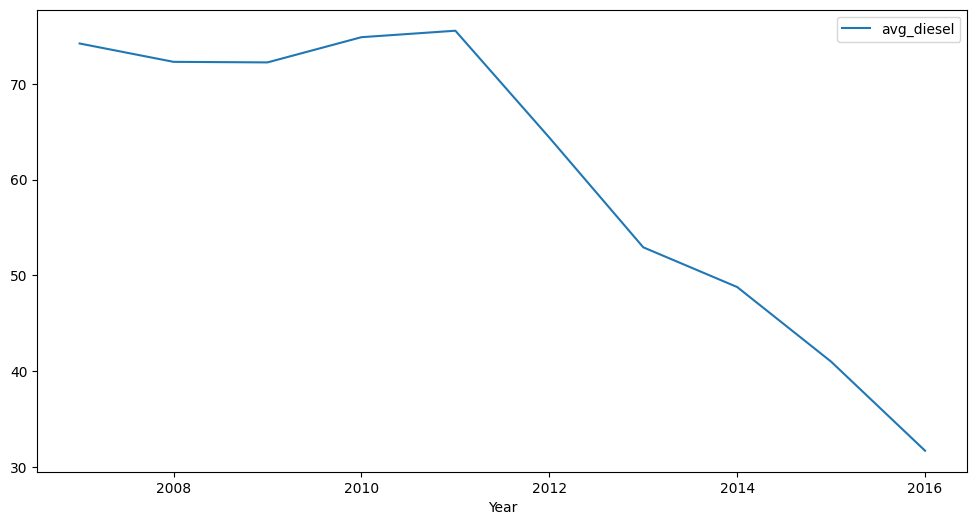

In [23]:
df_average_diesel_share_per_year.iloc[:-1].plot(x="Year", y="avg_diesel", figsize=(12,6))

# 1. Recreate graphs

## The following graphs below are created from this dataset. Try to recreate them as close as possible

  a) Here we use subplots to get two axes in one figure

bar chart and line chart

In [24]:
df_games = pd.read_csv("data/Steam Top 100 Played Games - List.csv")

df_games

,Rank,Name,Thumbnail URL,Store Link,Price,Current Players,Peak Today,Genre Tags
0,1,Counter-Strike 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/730/Counter...,Free To Play,"1,485,535","1,489,929","FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,PUBG: BATTLEGROUNDS,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/578080/PUBG...,Free To Play,"765,150","765,150","Survival, Shooter, Battle Royale, Multiplayer,..."
2,3,Dota 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/570/Dota_2?...,Free To Play,"698,757","715,295","Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,Marvel Rivals,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2767030/Mar...,Free To Play,"312,427","565,653","Free to Play, Multiplayer, Hero Shooter, Third..."
4,5,Path of Exile 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2694490/Pat...,£23.93,"258,475","288,757","Action RPG, Hack and Slash, RPG, Action, Souls..."
...,...,...,...,...,...,...,...,...
95,96,Sid Meier's Civilization® V,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/8930/Sid_Me...,£19.99,"17,916","21,754","Turn-Based Strategy, Strategy, Turn-Based, Mul..."
96,97,Counter-Strike,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/10/CounterS...,£7.19,"17,900","19,275","Action, FPS, Multiplayer, Shooter, Classic, Te..."
97,98,Cities: Skylines,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/255710/Citi...,£24.99,"17,866","18,067","City Builder, Simulation, Building, Management..."
98,99,Fallout 4,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/377160/Fall...,£15.99,"17,009","20,939","Open World, Post-apocalyptic, Singleplayer, RPG"


In [25]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             100 non-null    int64 
 1   Name             100 non-null    object
 2   Thumbnail URL    100 non-null    object
 3   Store Link       100 non-null    object
 4   Price            100 non-null    object
 5   Current Players  100 non-null    object
 6   Peak Today       100 non-null    object
 7   Genre Tags       100 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


In [26]:
df_games["Current Players"] = df_games["Current Players"].str.replace(",", "").astype(float)
df_games["Peak Today"] = df_games["Peak Today"].str.replace(",", "").astype(float)

In [30]:
df_most_popular_games = duckdb.query("""--sql
                                     SELECT Name AS Game, "Current Players" AS Players
                                     FROM df_games
                                     ORDER BY players
                                     DESC
                                     """).df()
df_top_10_most_popular_games = df_most_popular_games.head(10).set_index("Game")
df_top_10_most_popular_games

,Players
Game,
Counter-Strike 2,1485535.0
PUBG: BATTLEGROUNDS,765150.0
Dota 2,698757.0
Marvel Rivals,312427.0
Path of Exile 2,258475.0
Grand Theft Auto V,207117.0
NARAKA: BLADEPOINT,201876.0
Rust,168002.0
Palworld,165613.0


<Axes: xlabel='Game'>

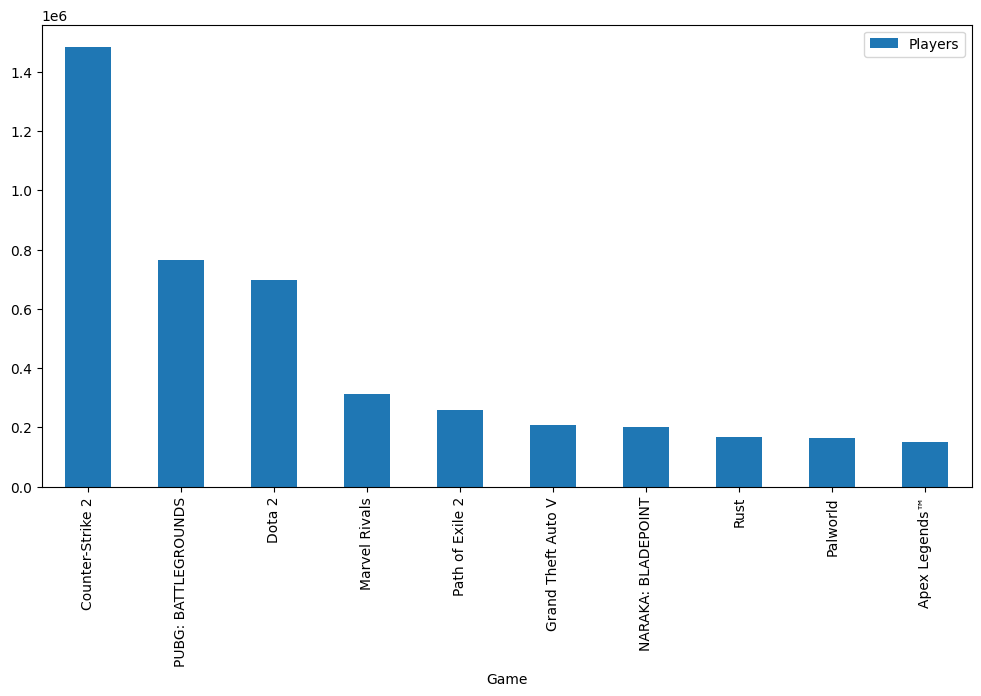

In [31]:
df_most_popular_games.iloc[0:10].plot(kind="bar", x="Game", y="Players", figsize=(12,6))

Text(0.8, 1200000, 'most popular games are free')

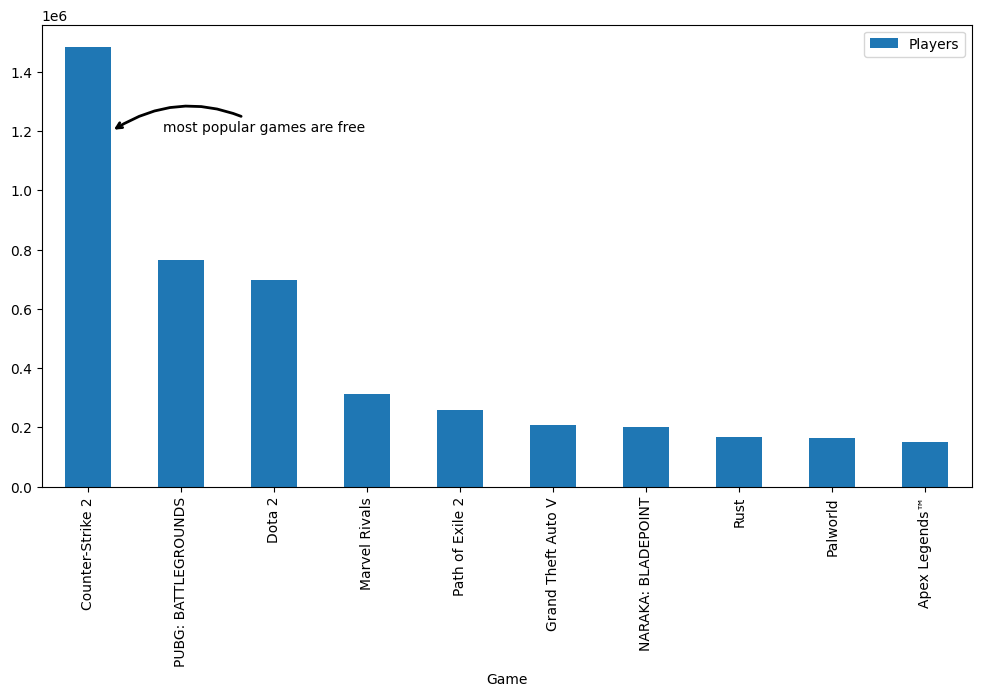

In [86]:
import matplotlib.pyplot as plt

ax = df_top_10_most_popular_games.plot(kind="bar", figsize=(12,6))

arrowprops = dict(arrowstyle = "->", linewidth = 2, connectionstyle = "arc3, rad=.3")


# text_position = (0.8,1200000)

# targets = [
#     (0.25,1200000),
#     (0.8, 765150),
#     (2.2, 698757),
# ]

# for target in targets:
#     ax.annotate(
#             text="most popular games are free" if target == targets[0] else "",
#             xy=target,
#             xytext=text_position,
#             arrowprops=arrowprops
#     )

ax.annotate(text= "most popular games are free", xy = [0.25,1200000], arrowprops=arrowprops, xytext=[.8, 1200000])



<Axes: xlabel='Game'>

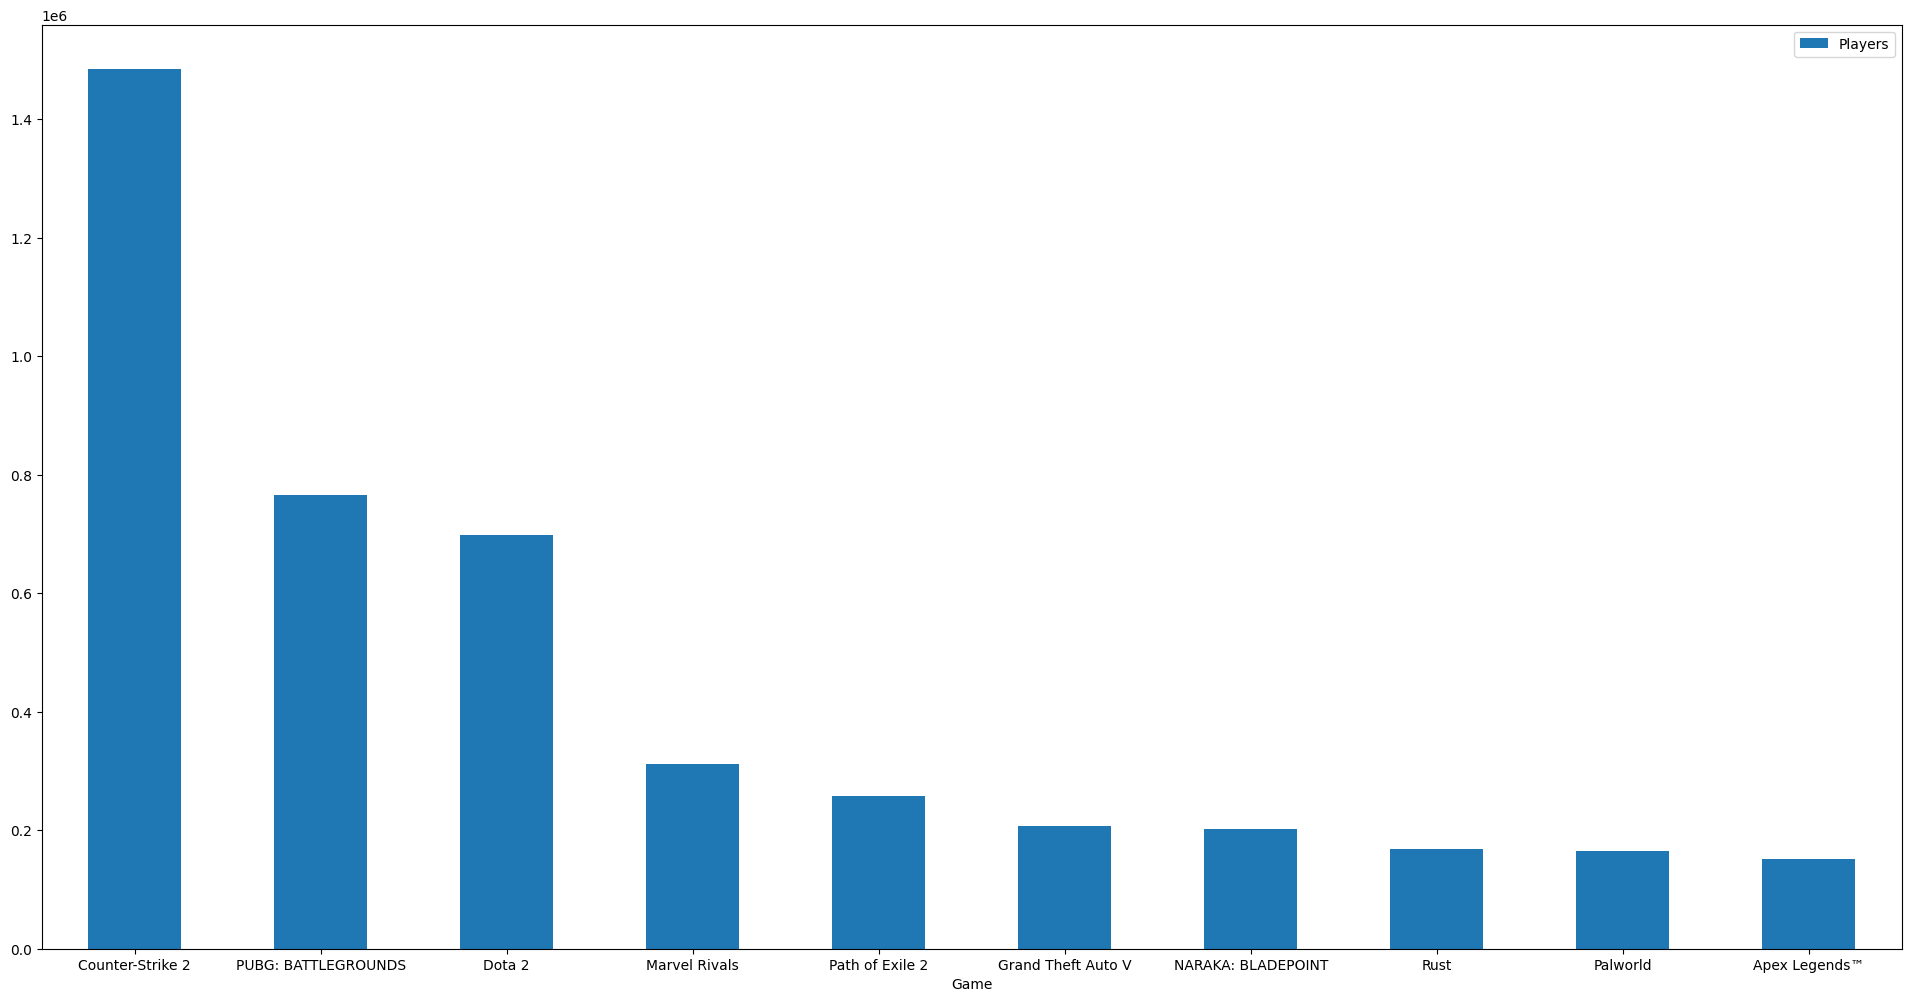

In [121]:


def plot_top_10_games():
    ax = df_top_10_most_popular_games.plot(kind="bar", figsize=(24,12))
    ax.set_xticklabels(df_top_10_most_popular_games.index, rotation = 0)

    # arrowprops = dict(arrowstyle = "->", linewidth = 2, connectionstyle = "arc3, rad=.3")
    # ax.annotate(text= "most popular games are free", xy = [0.25,1200000], arrowprops=arrowprops, xytext=[.8, 1200000])

    fig = ax.get_figure()

    return fig, ax
_, ax = plot_top_10_games()

ax


In [100]:
ax.containers

[<BarContainer object of 10 artists>]

In [102]:
ax.containers[0][0]

In [103]:
ax.containers[0][0].get_height(), ax.containers[0][0].get_x()

(np.float64(1485535.0), np.float64(-0.25))

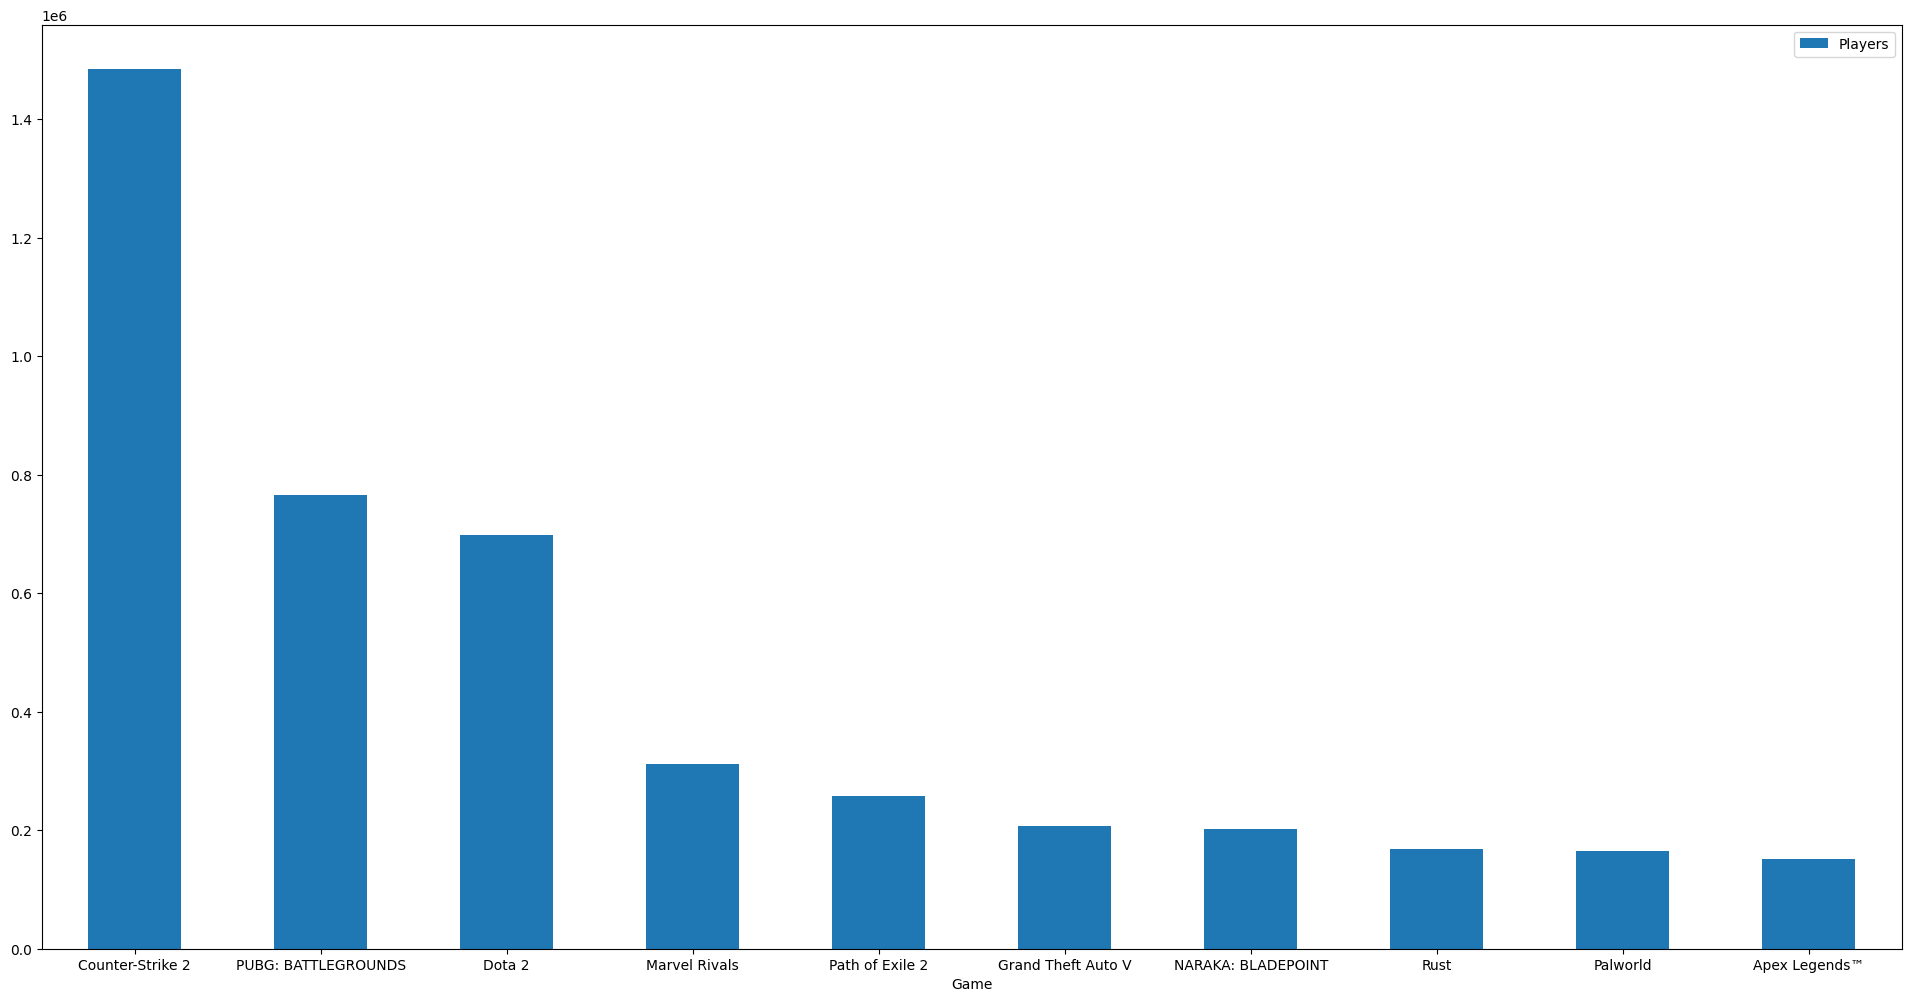

In [128]:
games = ax.containers

fig, ax = plot_top_10_games()

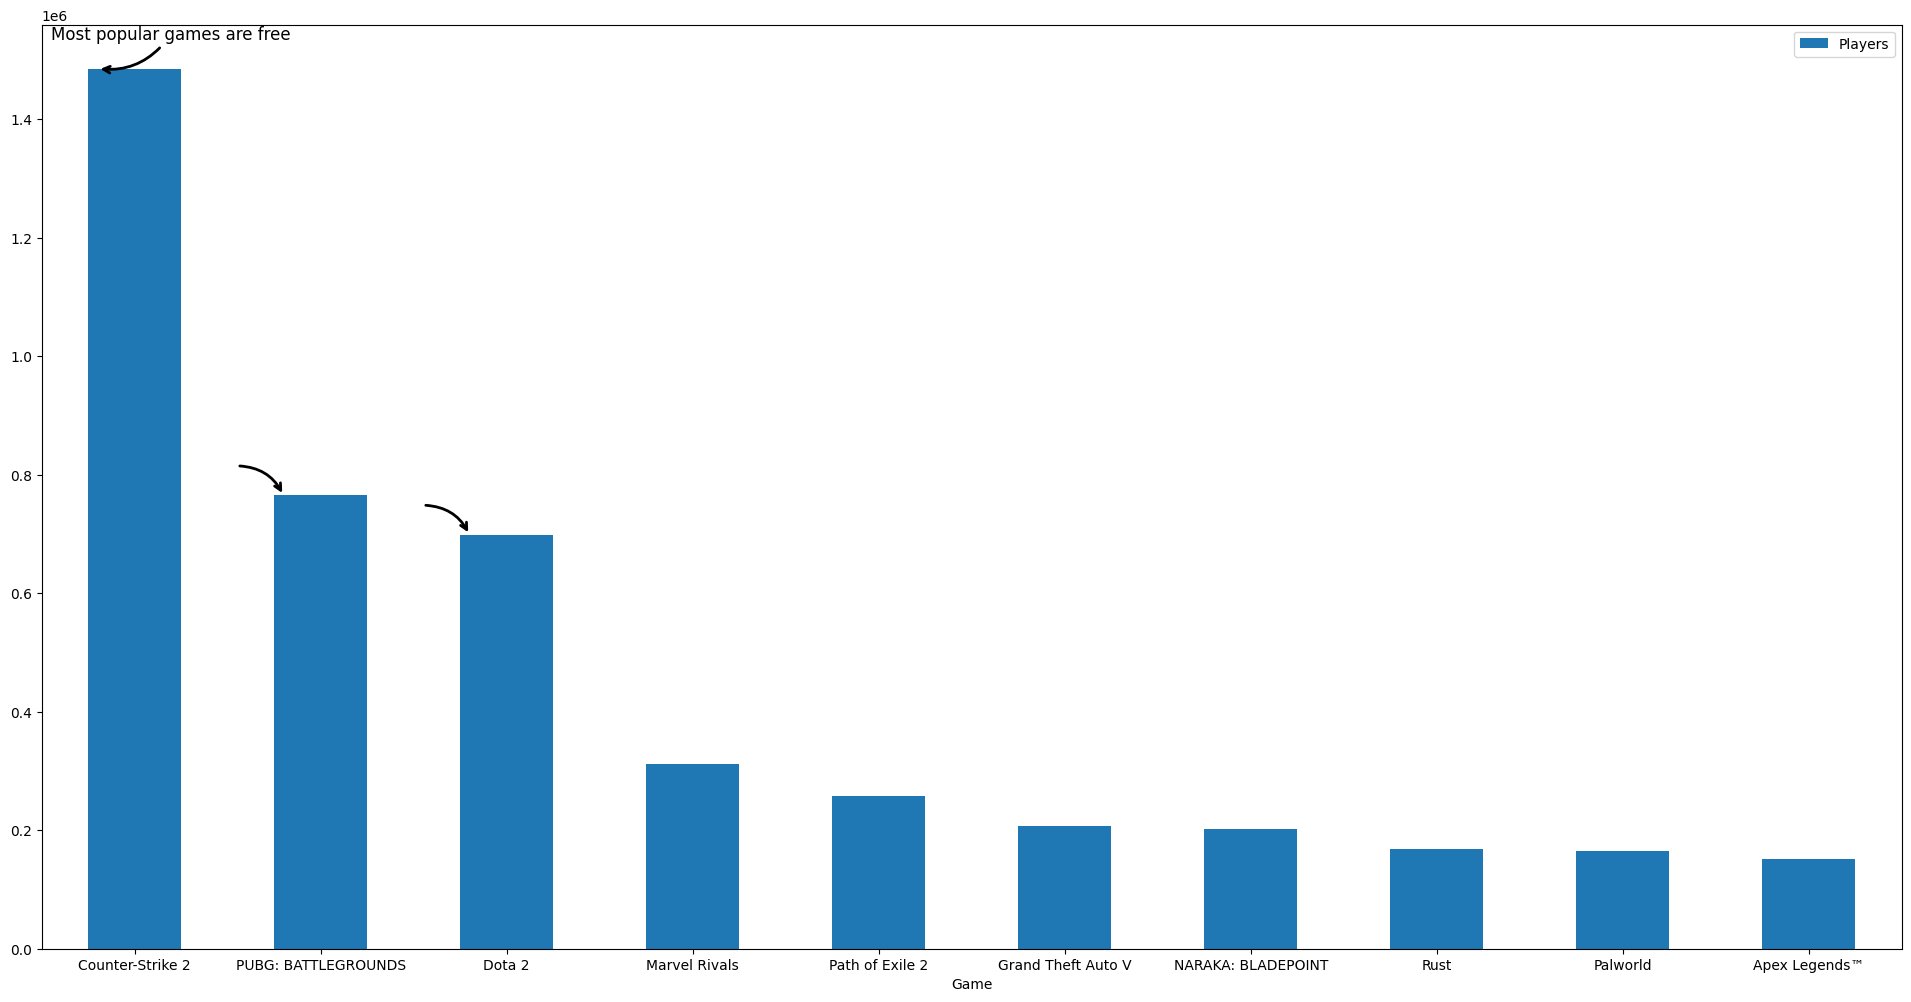

In [125]:
games = ax.containers[0]

fig, ax = plot_top_10_games()

def annotate_top_10_games(bar_artist, text, x_offset=0.3, y_offset = 800000):
    xy = (bar_artist.get_x(), bar_artist.get_height())

    rad = -0.3 if x_offset < 0 else 0.3

    arrowprops= dict(arrowstyle = "->", connectionstyle = f"arc3, rad={rad}", linewidth = 2)

    ax.annotate(
        text = text,
        xy = (xy[0] + 0.05, xy[1]),
        xytext= (xy[0] + x_offset, xy[1] + y_offset),
        arrowprops = arrowprops,
        fontsize = 12
    )

annotate_top_10_games(games[0], "Most popular games are free", x_offset=-0.2, y_offset=50000)
annotate_top_10_games(games[1], "", x_offset=-0.2, y_offset=50000)
annotate_top_10_games(games[2], "", x_offset=-0.2, y_offset=50000)

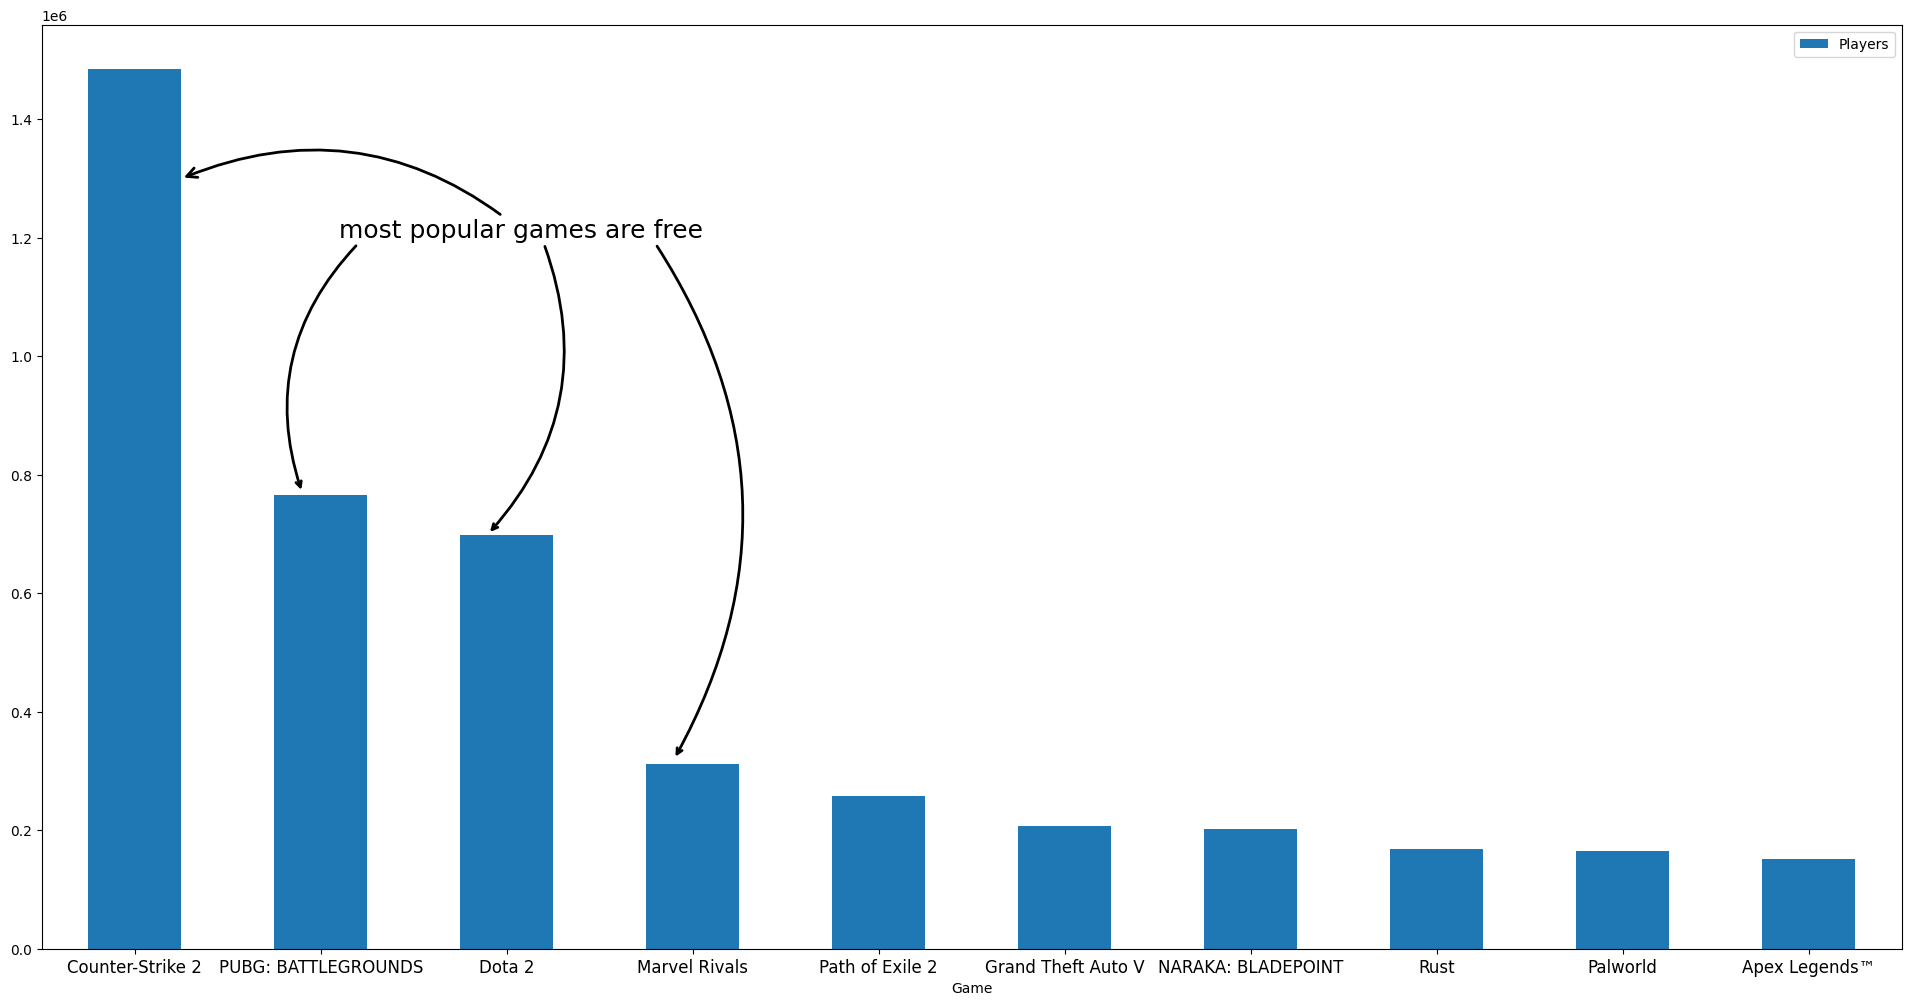

In [202]:
ax = df_top_10_most_popular_games.plot(kind="bar", figsize=(24,12))



arrowprops = dict(arrowstyle = "->", linewidth = 2, connectionstyle = "arc3, rad=.3")
arrowprops2 = dict(arrowstyle = "->", linewidth = 2, connectionstyle = "arc3, rad=-.3")
ax.set_xticklabels(df_top_10_most_popular_games.index, rotation = 0, fontsize=12)



ax.annotate(text= "most popular games are free", xy = [0.25,1300000], arrowprops=arrowprops, xytext=[1.1, 1200000], fontsize=18)
ax.annotate(text= "", xy = [0.9,770000], arrowprops=arrowprops, xytext=[1.2, 1190000])
ax.annotate(text= "", xy = [1.9,700000], arrowprops=arrowprops2, xytext=[2.2, 1190000])
ax.annotate(text= "", xy = [2.9,320000], arrowprops=arrowprops2, xytext=[2.8, 1190000])

fig.tight_layout()
